In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

df = pd.read_csv('../data/dataframe_with_extension.csv')
df.columns

Index(['Unnamed: 0', 'Data Input Year', 'State', 'Country', 'Language',
       'IPEDS Race Description', 'Athletic Code', 'Team Gender', 'Team Name',
       'HYR', 'Entering Term', 'Yr', 'FCLASS', 'RetentionClass', 'ACADINDEX',
       'SATCFORAI', 'ACTUSE', 'SATCUSE', 'SATVUSE', 'satm', 'satwr', 'HSGPA',
       'FIRSTCOLLEGE', 'FIRSTMAJOR', 'First Major Name', 'LASTCOLLEGE',
       'LASTMAJOR', 'Last Major Name', 'Last Cumulative BU GPA',
       'Cumulative GPA-1st Sem', 'Cumulative GPA-2nd Sem',
       'Cumulative GPA-3rd Sem', 'Cumulative GPA-4th Sem',
       'Cumulative GPA-5th Sem', 'Cumulative GPA-6th Sem',
       'Cumulative GPA-7th Sem', 'Cumulative GPA-8th Sem',
       'Cumulative GPA-9th Sem', 'Cumulative GPA-10th Sem',
       'Cumulative GPA-11th Sem', 'Cumulative GPA-12th Sem',
       'Cumulative GPA-13th Sem', 'Cumulative GPA-14th Sem',
       'Cumulative GPA-15th Sem', 'Cumulative GPA-16th Sem',
       'Cumulative GPA-17th Sem', 'Cumulative GPA-18th Sem',
       'Cumulativ

In [2]:
X = df.drop(columns=['Unnamed: 0', 'Data Input Year', 'State', 'IPEDS Race Description', 'Team Name',
       'HYR', 'Entering Term', 'Yr', 'FCLASS', 'RetentionClass', 'ACTUSE', 'SATCUSE', 'SATVUSE', 'satm', 'satwr', 
       'FIRSTCOLLEGE', 'First Major Name', 'LASTCOLLEGE', 'Last Major Name', 'Cumulative GPA-1st Sem', 'Cumulative GPA-2nd Sem',
       'Cumulative GPA-3rd Sem', 'Cumulative GPA-4th Sem',
       'Cumulative GPA-5th Sem', 'Cumulative GPA-6th Sem',
       'Cumulative GPA-7th Sem', 'Cumulative GPA-8th Sem',
       'Cumulative GPA-9th Sem', 'Cumulative GPA-10th Sem',
       'Cumulative GPA-11th Sem', 'Cumulative GPA-12th Sem',
       'Cumulative GPA-13th Sem', 'Cumulative GPA-14th Sem',
       'Cumulative GPA-15th Sem', 'Cumulative GPA-16th Sem',
       'Cumulative GPA-17th Sem', 'Cumulative GPA-18th Sem',
       'Cumulative GPA-19th Sem', 'Cumulative GPA-20th Sem',
       'Cumulative GPA-21st Sem', 'Cumulative GPA-22nd Sem',
       'Semester GPI-1st Sem', 'Semester GPI-2nd Sem', 'Semester GPI-3rd Sem',
       'Semester GPI-4th Sem', 'Semester GPI-5th Sem', 'Semester GPI-6th Sem',
       'Semester GPI-7th Sem', 'Semester GPI-8th Sem', 'Semester GPI-9th Sem',
       'Semester GPI-10th Sem', 'Semester GPI-11th Sem', 'Last Cumulative and First GPA diff', 'Standardized Test'
       ])
X.columns

Index(['Country', 'Language', 'Athletic Code', 'Team Gender', 'ACADINDEX',
       'SATCFORAI', 'HSGPA', 'FIRSTMAJOR', 'LASTMAJOR',
       'Last Cumulative BU GPA', 'SwitchedMajor', 'transfer',
       'Q1_COACH_LEADERSHIP', 'Q2_COACH_COMMUNICATION',
       'Q3_ASST_COACH_COMMUNICATION', 'Q4_STUDENT_ATHLETE_LEADERSHIP',
       'Q5_TRAINERS_CARE', 'Q6_TRAINERS_COMMUNICATION',
       'Q7_CONDITIONING_STAFF_COMMUNICATION', 'Q8_CONDITIONING_STAFF_JOB',
       'Q9_ACADEMIC_SUPPORT_SERVICES', 'Q10_DEVELOPMENT_SERVICES',
       'Q11_APPAREL_EQUIPMENT', 'Q12_SAFETY', 'Q13_ADMINISTRATIVE_SUPPORT',
       'Q14_DIVERSITY_ACCEPTANCE', 'Q15_EXPECTATION_EQUALITY_BY_GENDER',
       'Q16_TIME_DEMAND_AND_LIFE_BALANCE', 'Q17_COACH_EMPHASIS_ON_ACADEMICS'],
      dtype='object')

In [3]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X["Country"])
X["Country"] = label_encoder.transform(X["Country"])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X["Language"])
X["Language"] = label_encoder.transform(X["Language"])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X["Team Gender"])
X["Team Gender"] = label_encoder.transform(X["Team Gender"])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(X["Athletic Code"])
X["Athletic Code"] = label_encoder.transform(X["Athletic Code"])
X.head()


,Country,Language,Athletic Code,Team Gender,ACADINDEX,SATCFORAI,HSGPA,FIRSTMAJOR,LASTMAJOR,Last Cumulative BU GPA,...,Q8_CONDITIONING_STAFF_JOB,Q9_ACADEMIC_SUPPORT_SERVICES,Q10_DEVELOPMENT_SERVICES,Q11_APPAREL_EQUIPMENT,Q12_SAFETY,Q13_ADMINISTRATIVE_SUPPORT,Q14_DIVERSITY_ACCEPTANCE,Q15_EXPECTATION_EQUALITY_BY_GENDER,Q16_TIME_DEMAND_AND_LIFE_BALANCE,Q17_COACH_EMPHASIS_ON_ACADEMICS
0,6,0,3,0,198.0,1220.0,3.4,2204.0,2204.0,3.00,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
1,45,0,11,0,204.7,1230.0,3.6,602.0,601.0,3.46,...,3.26,3.81,3.43,3.33,3.96,3.70,3.67,3.74,3.37,3.63
2,45,0,8,0,216.0,1280.0,4.0,506.0,506.0,3.53,...,3.29,3.00,3.19,2.79,3.84,3.46,3.81,3.63,3.13,3.51
3,24,1,11,0,192.7,1190.0,3.2,317.0,317.0,3.86,...,3.26,3.81,3.43,3.33,3.96,3.70,3.67,3.74,3.37,3.63
4,16,1,8,0,NaN,NaN,3.5,2204.0,506.0,3.66,...,3.29,3.00,3.19,2.79,3.84,3.46,3.81,3.63,3.13,3.51


In [4]:
grouped_SAT = X[['Athletic Code', 'SATCFORAI']].groupby(['Athletic Code']).mean()
grouped_SAT.head()

,SATCFORAI
Athletic Code,
0,1392.820513
1,1360.625000
2,1231.785714
3,1142.413793
4,1278.524590


In [5]:
grouped_ACAD = X[['Athletic Code', 'ACADINDEX']].groupby(['Athletic Code']).mean()

In [6]:
grouped_HSGPA = X[['Athletic Code', 'HSGPA']].groupby(['Athletic Code']).mean()

In [7]:
merged_df = pd.merge(X, grouped_ACAD, on='Athletic Code')

In [8]:
merged_df = pd.merge(merged_df, grouped_SAT, on='Athletic Code')

In [9]:
X = pd.merge(merged_df, grouped_HSGPA, on='Athletic Code')

In [10]:
print(len(X))

993


In [11]:
X.ACADINDEX_x.fillna(X.ACADINDEX_y, inplace=True)
X.SATCFORAI_x.fillna(X.SATCFORAI_y, inplace=True)
X.HSGPA_x.fillna(X.HSGPA_y, inplace=True)
del X['ACADINDEX_y']
del X['SATCFORAI_y']
del X['HSGPA_y']
X.head()

,Country,Language,Athletic Code,Team Gender,ACADINDEX_x,SATCFORAI_x,HSGPA_x,FIRSTMAJOR,LASTMAJOR,Last Cumulative BU GPA,...,Q8_CONDITIONING_STAFF_JOB,Q9_ACADEMIC_SUPPORT_SERVICES,Q10_DEVELOPMENT_SERVICES,Q11_APPAREL_EQUIPMENT,Q12_SAFETY,Q13_ADMINISTRATIVE_SUPPORT,Q14_DIVERSITY_ACCEPTANCE,Q15_EXPECTATION_EQUALITY_BY_GENDER,Q16_TIME_DEMAND_AND_LIFE_BALANCE,Q17_COACH_EMPHASIS_ON_ACADEMICS
0,6,0,3,0,198.0,1220.0,3.4,2204.0,2204.0,3.00,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
1,45,0,3,0,198.0,1340.0,2.8,614.0,614.0,2.89,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
2,45,0,3,0,186.7,1150.0,3.0,518.0,518.0,2.39,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
3,45,0,3,0,193.5,1200.0,3.2,2001.0,518.0,3.46,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
4,6,0,3,0,208.5,1280.0,3.6,506.0,506.0,3.44,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71


In [12]:
counts = X.isna().sum()
print(counts.sort_values()[::-1])

FIRSTMAJOR                             11
LASTMAJOR                              11
Last Cumulative BU GPA                  2
Q17_COACH_EMPHASIS_ON_ACADEMICS         0
Q2_COACH_COMMUNICATION                  0
Language                                0
Athletic Code                           0
Team Gender                             0
ACADINDEX_x                             0
SATCFORAI_x                             0
HSGPA_x                                 0
SwitchedMajor                           0
transfer                                0
Q1_COACH_LEADERSHIP                     0
Q3_ASST_COACH_COMMUNICATION             0
Q16_TIME_DEMAND_AND_LIFE_BALANCE        0
Q4_STUDENT_ATHLETE_LEADERSHIP           0
Q5_TRAINERS_CARE                        0
Q6_TRAINERS_COMMUNICATION               0
Q7_CONDITIONING_STAFF_COMMUNICATION     0
Q8_CONDITIONING_STAFF_JOB               0
Q9_ACADEMIC_SUPPORT_SERVICES            0
Q10_DEVELOPMENT_SERVICES                0
Q11_APPAREL_EQUIPMENT             

In [13]:
X = X.dropna()

In [14]:
print(len(X))
X.head()

982


,Country,Language,Athletic Code,Team Gender,ACADINDEX_x,SATCFORAI_x,HSGPA_x,FIRSTMAJOR,LASTMAJOR,Last Cumulative BU GPA,...,Q8_CONDITIONING_STAFF_JOB,Q9_ACADEMIC_SUPPORT_SERVICES,Q10_DEVELOPMENT_SERVICES,Q11_APPAREL_EQUIPMENT,Q12_SAFETY,Q13_ADMINISTRATIVE_SUPPORT,Q14_DIVERSITY_ACCEPTANCE,Q15_EXPECTATION_EQUALITY_BY_GENDER,Q16_TIME_DEMAND_AND_LIFE_BALANCE,Q17_COACH_EMPHASIS_ON_ACADEMICS
0,6,0,3,0,198.0,1220.0,3.4,2204.0,2204.0,3.00,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
1,45,0,3,0,198.0,1340.0,2.8,614.0,614.0,2.89,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
2,45,0,3,0,186.7,1150.0,3.0,518.0,518.0,2.39,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
3,45,0,3,0,193.5,1200.0,3.2,2001.0,518.0,3.46,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71
4,6,0,3,0,208.5,1280.0,3.6,506.0,506.0,3.44,...,3.92,3.83,3.67,3.13,3.75,3.74,3.79,3.74,3.67,3.71


In [15]:
counts = X.isna().sum()
print(counts.sort_values()[::-1])

Q17_COACH_EMPHASIS_ON_ACADEMICS        0
Q2_COACH_COMMUNICATION                 0
Language                               0
Athletic Code                          0
Team Gender                            0
ACADINDEX_x                            0
SATCFORAI_x                            0
HSGPA_x                                0
FIRSTMAJOR                             0
LASTMAJOR                              0
Last Cumulative BU GPA                 0
SwitchedMajor                          0
transfer                               0
Q1_COACH_LEADERSHIP                    0
Q3_ASST_COACH_COMMUNICATION            0
Q16_TIME_DEMAND_AND_LIFE_BALANCE       0
Q4_STUDENT_ATHLETE_LEADERSHIP          0
Q5_TRAINERS_CARE                       0
Q6_TRAINERS_COMMUNICATION              0
Q7_CONDITIONING_STAFF_COMMUNICATION    0
Q8_CONDITIONING_STAFF_JOB              0
Q9_ACADEMIC_SUPPORT_SERVICES           0
Q10_DEVELOPMENT_SERVICES               0
Q11_APPAREL_EQUIPMENT                  0
Q12_SAFETY      

In [16]:
data = X

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data.head())

    Country  Language  Athletic Code  Team Gender  ACADINDEX_x  SATCFORAI_x  \
0  0.122449       0.0       0.142857          0.0     0.416667     0.415385   
1  0.918367       0.0       0.142857          0.0     0.416667     0.600000   
2  0.918367       0.0       0.142857          0.0     0.259722     0.307692   
3  0.918367       0.0       0.142857          0.0     0.354167     0.384615   
4  0.122449       0.0       0.142857          0.0     0.562500     0.507692   

    HSGPA_x  FIRSTMAJOR  LASTMAJOR  Last Cumulative BU GPA  ...  \
0  0.666667    0.395135   0.395135                  0.7500  ...   
1  0.333333    0.108649   0.108649                  0.7225  ...   
2  0.444444    0.091351   0.091351                  0.5975  ...   
3  0.555556    0.358559   0.091351                  0.8650  ...   
4  0.777778    0.089189   0.089189                  0.8600  ...   

   Q8_CONDITIONING_STAFF_JOB  Q9_ACADEMIC_SUPPORT_SERVICES  \
0                   0.961722                      0.952055  

Top correlated features:
HSGPA_x                                0.377644
ACADINDEX_x                            0.326389
SATCFORAI_x                            0.249836
Team Gender                            0.236674
Q15_EXPECTATION_EQUALITY_BY_GENDER     0.159751
LASTMAJOR                              0.106564
Athletic Code                          0.106092
Q16_TIME_DEMAND_AND_LIFE_BALANCE       0.103556
Q9_ACADEMIC_SUPPORT_SERVICES           0.103217
Q17_COACH_EMPHASIS_ON_ACADEMICS        0.096833
Q14_DIVERSITY_ACCEPTANCE               0.085529
FIRSTMAJOR                             0.082710
Language                               0.081509
Q11_APPAREL_EQUIPMENT                  0.057677
Q10_DEVELOPMENT_SERVICES               0.056313
Q1_COACH_LEADERSHIP                    0.048784
transfer                               0.048328
Country                                0.047215
Q3_ASST_COACH_COMMUNICATION            0.045970
SwitchedMajor                          0.042487
Q13_ADMINISTRAT

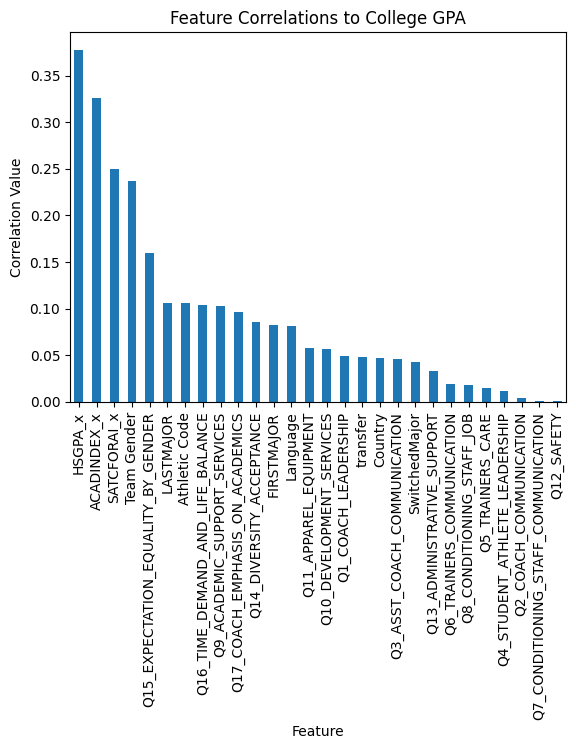

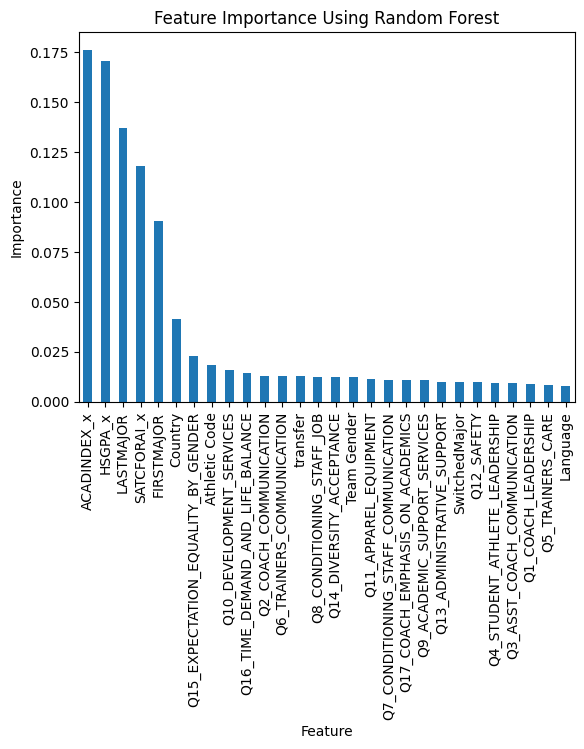


Feature importance:
ACADINDEX_x                            0.176189
HSGPA_x                                0.170795
LASTMAJOR                              0.136839
SATCFORAI_x                            0.118032
FIRSTMAJOR                             0.090498
Country                                0.041410
Q15_EXPECTATION_EQUALITY_BY_GENDER     0.022708
Athletic Code                          0.018402
Q10_DEVELOPMENT_SERVICES               0.016007
Q16_TIME_DEMAND_AND_LIFE_BALANCE       0.014257
Q2_COACH_COMMUNICATION                 0.013152
Q6_TRAINERS_COMMUNICATION              0.013095
transfer                               0.012826
Q8_CONDITIONING_STAFF_JOB              0.012473
Q14_DIVERSITY_ACCEPTANCE               0.012228
Team Gender                            0.012211
Q11_APPAREL_EQUIPMENT                  0.011621
Q7_CONDITIONING_STAFF_COMMUNICATION    0.011131
Q17_COACH_EMPHASIS_ON_ACADEMICS        0.011014
Q9_ACADEMIC_SUPPORT_SERVICES           0.010732
Q13_ADMINISTRATIVE_

In [18]:
import matplotlib.pyplot as plt
# Assuming 'college_GPA' is the target variable
y = data['Last Cumulative BU GPA']
X = data.drop(columns=['Last Cumulative BU GPA'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Correlation Analysis
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Last Cumulative BU GPA'].abs().sort_values(ascending=False)
top_correlated_features = correlation_with_target[1:]  # Exclude the target variable

print("Top correlated features:")
print(top_correlated_features)

top_correlated_features.plot.bar()
plt.title("Feature Correlations to College GPA")
plt.xlabel("Feature")
plt.ylabel("Correlation Value")
plt.show()

# Feature Importance using Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances.plot.bar()
plt.title("Feature Importance Using Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()
#plt.plot(feature_importances.index, feature_importances.values)

print("\nFeature importance:")
print(feature_importances)

# Recursive Feature Elimination (RFE) with Linear Regression
linear_reg = LinearRegression()
rfe = RFE(linear_reg, n_features_to_select=8)  # Select top 5 features
rfe.fit(X_train, y_train)

print("\nRFE selected features:")
print(X.columns[rfe.support_])

# Principal Component Analysis (PCA)
pca = PCA(n_components=8)  # Select top 5 components
pca.fit(X_train)

print("\nPCA explained variance ratios:")
print(pca.explained_variance_ratio_)